<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521720---Truong-Y-Nhi/LSTM_5_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BỘ DỮ LIỆU DELL

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df1 = pd.read_csv('/content/DELL.csv')
df1=df1.reset_index()['Close']

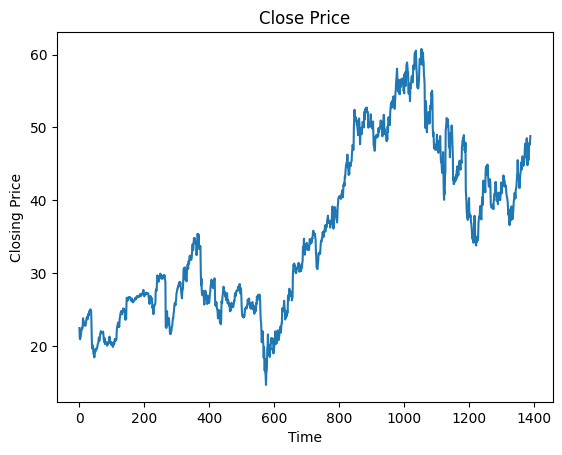

In [3]:
#Vẽ biểu đồ chuỗi thời gian của giá đóng cửa để kiểm tra xu hướng và dao động của dữ liệu:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title('Close Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [6]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [9]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 22s 541ms/step - loss: 0.0227 - val_loss: 0.0593
Epoch 2/100
10/10 [==============================] - 3s 285ms/step - loss: 0.0039 - val_loss: 0.0556
Epoch 3/100
10/10 [==============================] - 2s 225ms/step - loss: 0.0032 - val_loss: 0.1032
Epoch 4/100
10/10 [==============================] - 2s 227ms/step - loss: 0.0028 - val_loss: 0.0441
Epoch 5/100
10/10 [==============================] - 2s 228ms/step - loss: 0.0025 - val_loss: 0.0529
Epoch 6/100
10/10 [==============================] - 2s 236ms/step - loss: 0.0021 - val_loss: 0.0360
Epoch 7/100
10/10 [==============================] - 4s 444ms/step - loss: 0.0020 - val_loss: 0.0187
Epoch 8/100
10/10 [==============================] - 4s 405ms/step - loss: 0.0018 - val_loss: 0.0089
Epoch 9/100
10/10 [==============================] - 5s 540ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 10/100
10/10 [==============================] - 4s 388ms/step - loss: 0.0016 - val_l

In [11]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 42ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [14]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 1.1915323652487513
Testing RMSE: 1.6329782462404803
Testing MAE: 1.307262548016126
Validation MAE: 0.9596020357185979
Testing MAPE: 0.025642117621805082
Validation MAPE: 0.023599562457423683


In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.758738]
101
1 day input [0.57236487 0.56261139 0.56109418 0.57128118 0.55654259 0.55004022
 0.5632616  0.57648298 0.60227543 0.59837413 0.57063088 0.59295554
 0.58970434 0.59403923 0.6087778  0.62351639 0.61549681 0.61051171
 0.6087778  0.60357593 0.59078804 0.58905413 0.59382245 0.58471926
 0.57149788 0.56369508 0.55936021 0.55350811 0.54527192 0.52966636
 0.50647479 0.52316405 0.5021399  0.47873163 0.47548046 0.49672131
 0.49585431 0.50755849 0.48956881 0.51839567 0.53140035 0.50820879
 0.50257341 0.49303671 0.50625809 0.51319387 0.53075006 0.54678913
 0.55437511 0.57084767 0.56868019 0.56716298 0.55480862 0.58081785
 0.58450245 0.59035455 0.60726062 0.6209154  0.63500376 0.6690325
 0.63283636 0.61311261 0.6172308  0.6079108  0.58688665 0.58601966
 0.61051171 0.62546708 0.63261958 0.65299343 0.66166322 0.64042235
 0.6666483  0.68030317 0.6794362  0.67618509 0.65169304 0.65299343
 0.65667812 0.6664316  0.67661849 0.70414495 0.71779982 0.71324822
 0.68745567 0.67791899 0.7249524  0.

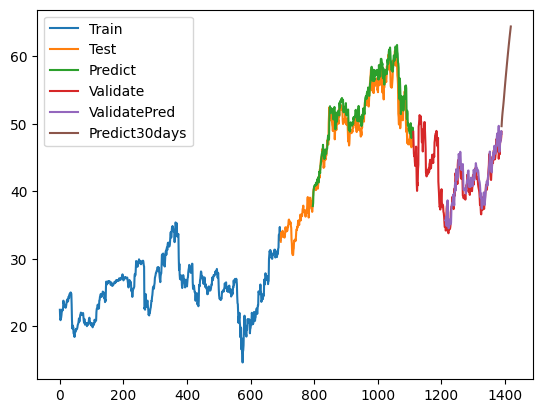

In [16]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
predict_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

BỘ DỮ LIỆU MSFT

In [17]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/MSFT.csv')
df1=df.reset_index()['Close']

In [18]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [20]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [23]:

# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 11s 481ms/step - loss: 0.0305 - val_loss: 0.0054
Epoch 2/100
10/10 [==============================] - 2s 225ms/step - loss: 0.0063 - val_loss: 0.0679
Epoch 3/100
10/10 [==============================] - 2s 223ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 4/100
10/10 [==============================] - 2s 224ms/step - loss: 9.5123e-04 - val_loss: 0.0092
Epoch 5/100
10/10 [==============================] - 2s 228ms/step - loss: 7.9286e-04 - val_loss: 0.0024
Epoch 6/100
10/10 [==============================] - 3s 327ms/step - loss: 6.5774e-04 - val_loss: 0.0028
Epoch 7/100
10/10 [==============================] - 3s 242ms/step - loss: 7.2633e-04 - val_loss: 0.0025
Epoch 8/100
10/10 [==============================] - 2s 223ms/step - loss: 6.2566e-04 - val_loss: 0.0020
Epoch 9/100
10/10 [==============================] - 2s 237ms/step - loss: 6.3141e-04 - val_loss: 0.0020
Epoch 10/100
10/10 [==============================] - 2s 232ms/ste

In [25]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 50ms/step


In [26]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [27]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [28]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 10.389973691357524
Testing RMSE: 8.134035208889385
Testing MAE: 6.561771425342418
Validation MAE: 8.016588461908585
Testing MAPE: 0.02336150048280855
Validation MAPE: 0.03203451957516225


In [29]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9482355]
101
1 day input [0.61634168 0.61428081 0.60882345 0.63702633 0.63763696 0.61683783
 0.63630121 0.65515402 0.70037788 0.67652565 0.67049574 0.71167427
 0.70850674 0.69663781 0.69465334 0.7260238  0.72926773 0.71839109
 0.69102776 0.67541887 0.65484871 0.65042172 0.66286308 0.64168229
 0.64526968 0.64244555 0.63042405 0.6488952  0.66484755 0.6708774
 0.6604969  0.65877955 0.65351302 0.63927796 0.65961916 0.68583757
 0.7035836  0.74464765 0.75697441 0.7294967  0.73541201 0.72972568
 0.7502195  0.76132511 0.74533456 0.74094578 0.76109614 0.77460596
 0.79082548 0.78674206 0.78655117 0.77571273 0.80341952 0.79498541
 0.76995    0.77246881 0.7967027  0.78258225 0.79273365 0.79109265
 0.79139802 0.78246764 0.78113201 0.76590467 0.74167089 0.81780715
 0.85390986 0.86318369 0.85669584 0.85612341 0.85226885 0.85612341
 0.87612108 0.86848837 0.8621914  0.88245625 0.87406021 0.86970963
 0.8715796  0.8802809  0.8889059  0.90615579 0.90546888 0.91630732
 0.89371455 0.88833347 0.93439693 0

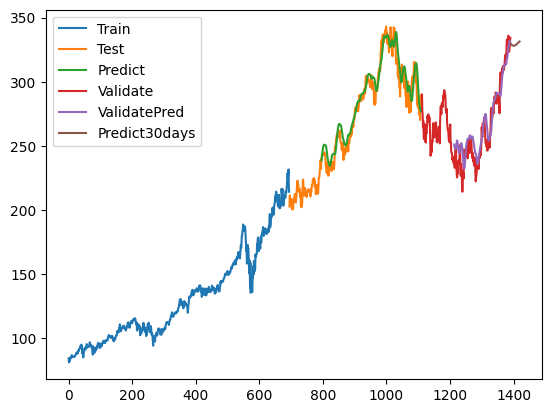

In [30]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

BỘ DỮ LIỆU ASUS


In [31]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/2357.TW.csv')
df1=df.reset_index()['Close']

In [32]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [34]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [37]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 11s 397ms/step - loss: 0.0244 - val_loss: 0.0233
Epoch 2/100
9/9 [==============================] - 2s 233ms/step - loss: 0.0049 - val_loss: 0.1047
Epoch 3/100
9/9 [==============================] - 4s 461ms/step - loss: 0.0033 - val_loss: 0.0411
Epoch 4/100
9/9 [==============================] - 4s 392ms/step - loss: 0.0025 - val_loss: 0.0411
Epoch 5/100
9/9 [==============================] - 2s 246ms/step - loss: 0.0020 - val_loss: 0.0173
Epoch 6/100
9/9 [==============================] - 4s 464ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 7/100
9/9 [==============================] - 2s 234ms/step - loss: 0.0015 - val_loss: 0.0043
Epoch 8/100
9/9 [==============================] - 3s 363ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 9/100
9/9 [==============================] - 2s 246ms/step - loss: 0.0014 - val_loss: 0.0044
Epoch 10/100
9/9 [==============================] - 2s 239ms/step - loss: 0.0014 - val_loss: 0.0038
Epoch 11

In [39]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

6/6 [==============================] - 0s 41ms/step


In [40]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [41]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [42]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 5.511922031009565
Testing RMSE: 13.877711985490585
Testing MAE: 11.589082939680232
Validation MAE: 4.023457092646312
Testing MAPE: 0.03193054314572585
Validation MAPE: 0.014991904859982978


In [43]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.64227307]
101
1 day input [0.42259414 0.43723849 0.41422594 0.41213389 0.39539749 0.40794979
 0.41213389 0.40794979 0.458159   0.42468619 0.43723849 0.45188285
 0.44979079 0.44142259 0.44979079 0.44769874 0.44142259 0.41631799
 0.43514644 0.44351464 0.44142259 0.44979079 0.45606695 0.44979079
 0.45606695 0.45606695 0.46025105 0.44979079 0.44142259 0.4623431
 0.4748954  0.48535565 0.49790795 0.48953975 0.48117155 0.5125523
 0.39958159 0.37866109 0.38075314 0.38702929 0.42050209 0.39958159
 0.41004184 0.41213389 0.41422594 0.41631799 0.41422594 0.41004184
 0.42259414 0.42677824 0.42677824 0.41841004 0.41631799 0.42050209
 0.43096234 0.45188285 0.43933054 0.44769874 0.4623431  0.45188285
 0.45188285 0.44351464 0.44142259 0.45188285 0.44979079 0.43933054
 0.458159   0.46861925 0.4832636  0.48953975 0.5083682  0.4958159
 0.49372385 0.5083682  0.50627615 0.48535565 0.46443515 0.55648536
 0.55648536 0.55648536 0.57531381 0.57531381 0.56903766 0.57112971
 0.57531381 0.56066946 0.57740586 0.

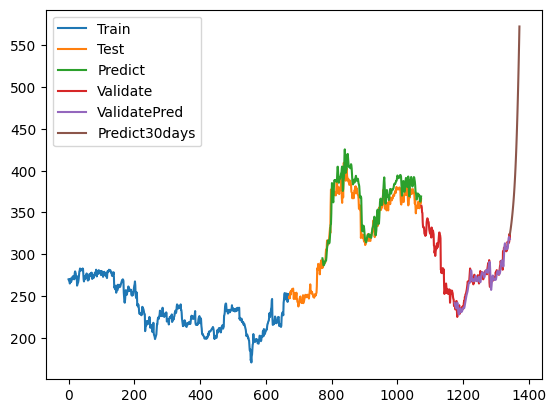

In [44]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()